# Assigment 3


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

## Get Data

In [3]:
data_original = pd.read_csv('Pressupostos_dels_ens_municipals_de_Catalunya.csv')
data_original.head(6)

,ANY_EXERCICI,TIPUS_PARTIDA,TIPUS_CLASSIF,CODI_PANTALLA,NIVELL,DESCRIPCIO,IMPORT,ID_ESTRUCTURA,ESTRUCTURA,CODI_ENS,NOM_COMPLERT
0,01/01/2016 12:00:00 AM,I,E,3.0,1,"Taxes, preus públics i altres ingressos",20.0,7,3,9820170005,Agència Local d'Energia de Barcelona
1,01/01/2016 12:00:00 AM,I,E,36.0,2,Vendes,8.0,7,36,9820170005,Agència Local d'Energia de Barcelona
2,01/01/2016 12:00:00 AM,I,E,38.0,2,Reintegraments d'operacions corrents,6.0,7,38,9820170005,Agència Local d'Energia de Barcelona
3,01/01/2016 12:00:00 AM,I,E,389.0,3,Altres reintegraments d'operacions corrents,6.0,7,3809,9820170005,Agència Local d'Energia de Barcelona
4,01/01/2016 12:00:00 AM,I,E,39.0,2,Altres ingressos,6.0,7,39,9820170005,Agència Local d'Energia de Barcelona
5,01/01/2016 12:00:00 AM,I,E,399.0,3,Altres ingressos diversos,6.0,7,3909,9820170005,Agència Local d'Energia de Barcelona


## Preparing Data

In [4]:
data_16 = data_original.loc[data_original.ANY_EXERCICI == '01/01/2016 12:00:00 AM']
data_16.shape

(624092, 11)

In [5]:
data_16_aj = data_16.loc[data_16.NOM_COMPLERT.str.contains('Ajuntament')]
data_16_aj.shape

(434340, 11)

In [6]:
data_16_aj_no0=data_16_aj.loc[data_16_aj.IMPORT > 0.0]

In [7]:
name, counts = np.unique(data_16_aj_no0.NOM_COMPLERT, return_counts = True)
print(np.amax(counts), np.amin(counts), np.mean(counts), np.median(counts))


387 47 201.99092970521542 193.0


In [8]:
np.unique(data_16_aj_no0.TIPUS_PARTIDA)


array(['D', 'I'], dtype=object)

In [9]:
np.unique(data_16_aj_no0.TIPUS_CLASSIF)


array(['E', 'F'], dtype=object)

In [10]:
np.unique(data_16_aj_no0.NIVELL)


array([1, 2, 3, 4], dtype=int64)

## Data Cleaning

In [11]:
data_sorted=data_16_aj_no0[['NOM_COMPLERT','CODI_ENS','TIPUS_PARTIDA','TIPUS_CLASSIF','CODI_PANTALLA', 'NIVELL', 'IMPORT','DESCRIPCIO','ESTRUCTURA']].astype(str)

data_sorted.sort_values(['CODI_ENS','TIPUS_PARTIDA','TIPUS_CLASSIF','CODI_PANTALLA'])
    

,NOM_COMPLERT,CODI_ENS,TIPUS_PARTIDA,TIPUS_CLASSIF,CODI_PANTALLA,NIVELL,IMPORT,DESCRIPCIO,ESTRUCTURA
4011,Ajuntament d'Agullana,1700100000,D,E,1.0,1,287505.72,Despeses de personal,1
4012,Ajuntament d'Agullana,1700100000,D,E,10.0,2,17505.72,Òrgans de govern i personal directiu,10
4013,Ajuntament d'Agullana,1700100000,D,E,100.0,3,17505.72,Retr. bàs. i altres rem. membres òrgans de govern,1000
4014,Ajuntament d'Agullana,1700100000,D,E,100.0,4,17505.72,Retribucions bàsiques,100000
4015,Ajuntament d'Agullana,1700100000,D,E,12.0,2,38000.0,Personal funcionari,12
4016,Ajuntament d'Agullana,1700100000,D,E,120.0,3,12000.0,Retribucions bàsiques,1200
4017,Ajuntament d'Agullana,1700100000,D,E,120.0,4,12000.0,Sous del grup A1,120000
4018,Ajuntament d'Agullana,1700100000,D,E,121.0,3,26000.0,Retribucions complementàries,1201
4019,Ajuntament d'Agullana,1700100000,D,E,121.0,4,26000.0,Complement de destinació,120100
4020,Ajuntament d'Agullana,1700100000,D,E,13.0,2,165000.0,Personal laboral,13


# Data Investigation

## Número ajuntaments

In [12]:
nom=np.unique(data_16_aj_no0.NOM_COMPLERT)
print('Número ajuntaments',len(nom))

Número ajuntaments 882


###### Will you need to transform data in a some way in order to be able to compare different budgets? 
SÍ
##### How?
* Veure ingressos i despeses de cada ajuntament
* Veure la gestió de pressupost de cada ajuntament
* Veure ajuntaments amb beneficis i deutes
- Veure número de descripcions per cada ajuntament

## Ingressos i despeses de cada ajuntament

In [13]:
def get_import_ajuntament(data, codi_ens, tipus):
    r= np.unique(data.loc[(data.CODI_ENS == codi_ens) & (data.TIPUS_PARTIDA == tipus), ['IMPORT']].IMPORT)
    suma=0
    for price in r:
        suma=suma+(float(price))
    return suma

def get_ingressos_despesa_per_ajuntament(data):
    codi_ens = np.unique(data.CODI_ENS)
    nom = np.unique(data.NOM_COMPLERT)



    data_comparative = pd.DataFrame(columns=['NOM_COMPLERT','CODI_ENS', 'DESPESES','INGRESSOS'])
    
    i = 0
    for ens in codi_ens:
      
        despesses = get_import_ajuntament(data, ens, 'D')
        ingressos = get_import_ajuntament(data, ens, 'I')
        data_comparative.loc[i] = [nom[i], ens, despesses,ingressos]

        i = i +1
        
    return data_comparative


ingres_despesa = get_ingressos_despesa_per_ajuntament(data_sorted)


        

In [14]:

ingres_despesa.sort_values(['DESPESES'])

,NOM_COMPLERT,CODI_ENS,DESPESES,INGRESSOS
246,Ajuntament de Cornellà de Llobregat,2504500000,3.258840e+05,4.151196e+05
669,Ajuntament de Torrelles de Llobregat,808040003,4.047500e+05,2.469250e+05
234,Ajuntament de Coll de Nargó,2503130008,4.327365e+05,2.499653e+05
681,Ajuntament de Tàrrega,809300000,4.388000e+05,2.266000e+05
263,Ajuntament de Figueres,2506420002,4.653924e+05,3.016452e+05
760,Ajuntament de l'Albiol,817700000,4.664740e+05,2.132920e+05
327,Ajuntament de Llambilles,2514840003,5.379580e+05,5.603847e+05
136,Ajuntament de Bigues i Riells,1715760009,5.778092e+05,3.408095e+05
342,Ajuntament de Lluçà,2516670005,6.079107e+05,4.098067e+05
646,Ajuntament de Taradell,805750006,6.131667e+05,2.808147e+05


## Gestió de pressupostos de cada ajuntament

In [15]:
def get_presupostos(data):
    codi_ens = np.unique(data.CODI_ENS)
    nom = np.unique(data.NOM_COMPLERT)
    data_comparative = pd.DataFrame(columns=['NOM_COMPLERT','CODI_ENS', 'PRESSUPOST'])
    
    i = 0
    for ens in codi_ens:
      
        despesses = get_import_ajuntament(data, ens, 'D')
        ingressos = get_import_ajuntament(data, ens, 'I')
        data_comparative.loc[i] = [nom[i], ens,(ingressos-despesses)]

        i = i +1
        
    return data_comparative


presupostos = get_presupostos(data_sorted)


        

## Ajuntaments amb beneficis i deutes

### Ajuntaments amb beneficis

In [16]:
benefici=presupostos.loc[presupostos.PRESSUPOST >= 0.0]
benefici.head(100)

,NOM_COMPLERT,CODI_ENS,PRESSUPOST
246,Ajuntament de Cornellà de Llobregat,2504500000,89235.57
327,Ajuntament de Llambilles,2514840003,22426.67


### Número ajuntaments amb deutes

In [17]:
deute=presupostos.loc[presupostos.PRESSUPOST < 0.0]
deute.sort_values(['PRESSUPOST'])



,NOM_COMPLERT,CODI_ENS,PRESSUPOST
616,Ajuntament de Sarrià de Ter,801930008,-5.882922e+09
689,Ajuntament de Vallcebre,810170005,-7.118878e+08
769,Ajuntament de l'Espluga Calba,818780001,-5.616151e+08
852,Ajuntament del Molar,827980001,-5.201083e+08
613,Ajuntament de Santa Susanna,801550006,-4.952324e+08
302,Ajuntament de Granera,2512070005,-4.742309e+08
564,Ajuntament de Sant Martí Sarroca,4314820002,-4.561635e+08
786,Ajuntament de la Galera,820550006,-3.926472e+08
709,Ajuntament de Vila-sacra,812130008,-3.739532e+08
72,Ajuntament d'Isòvol,1707920002,-3.514896e+08


### Número de descripcions per cada ajuntament

In [18]:
nom_ajuntaments= np.unique(data_sorted.NOM_COMPLERT)
data = pd.DataFrame(columns=['NOM_COMPLERT','DESCRIPCIO'])

i = 0
for nom in nom_ajuntaments:
    descriptions = data_sorted.loc[data_sorted["NOM_COMPLERT"] == nom]
    num_description = np.unique(descriptions.DESCRIPCIO)
    data.loc[i] = [nom, len(num_description)]
    
    i += 1

data.head(10)

,NOM_COMPLERT,DESCRIPCIO
0,Ajuntament d'Abrera,229
1,Ajuntament d'Agramunt,217
2,Ajuntament d'Aguilar de Segarra,236
3,Ajuntament d'Agullana,147
4,Ajuntament d'Aiguafreda,193
5,Ajuntament d'Aiguamúrcia,194
6,Ajuntament d'Aiguaviva,167
7,Ajuntament d'Aitona,248
8,Ajuntament d'Albanyà,114
9,Ajuntament d'Albatàrrec,103


# Cluster
* Girem les files i les passem a columnes (pivot)
* Probar fer el PCA (veiem els principals cluesters)
* Passar els ingressos i despeses a tan per cent
* Fer el plot per veure el cluster


In [19]:
data_sorted.pivot( columns='NOM_COMPLERT', values='IMPORT')




NOM_COMPLERT,Ajuntament d'Abrera,Ajuntament d'Agramunt,Ajuntament d'Aguilar de Segarra,Ajuntament d'Agullana,Ajuntament d'Aiguafreda,Ajuntament d'Aiguamúrcia,Ajuntament d'Aiguaviva,Ajuntament d'Aitona,Ajuntament d'Albanyà,Ajuntament d'Albatàrrec,...,Ajuntament dels Alamús,Ajuntament dels Garidells,Ajuntament dels Hostalets de Pierola,Ajuntament dels Omellons,Ajuntament dels Omells de na Gaia,Ajuntament dels Pallaresos,Ajuntament dels Plans de Sió,Ajuntament dels Torms,Informàtica Ajuntament de Sabadell (IAS),Patronat de l'Escola Municipal de Música i Dansa de l'Ajuntament de Móra d'Ebre
245,None,394700.0,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
671,None,None,None,None,None,None,7000.0,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2325,6672307.27,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2326,5593799.37,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2327,6007.85,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2328,3954000.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2329,800000.0,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2330,833791.52,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2331,1078507.9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2332,1078507.9,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None



## Cluster
Fer una taula, que agrupi ajuntament, amb totes les dades
Girem les files i les passem a columnes (pivot)
Probar fer el PCA (veiem els principals cluesters)
Passar els ingressos i despeses a tan per cent
Fer el plot per veure el cluster

## He pensat:
* Agafem les dades en valors
* Llegim  tots els valors en numeros, és a dir, posem codi per E i F, per D i I (o llegim import), i llegim el leng de la descripcio/ si coincideixen haurem d'agafar la relacio clau-value
* Posem totes les dades en una fila que pertanyen a un ajuntament
* Fem e

In [38]:
dfDespeses=pd.DataFrame(columns=['INGRESSOS','DESPESES'])
dfDespeses['DESPESES']=ingres_despesa['DESPESES']
dfDespeses['INGRESSOS']=ingres_despesa['INGRESSOS']
features =['INGRESSOS','DESPESES']
# Separar les variables explicatives
x = dfDespeses.loc[:, features].values

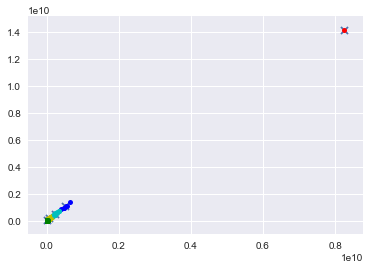

In [131]:

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
centros = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","c.","y.","b."]

for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centros[:, 0],centros[:, 1], marker = "x", s=50, linewidths = 5)

plt.show()



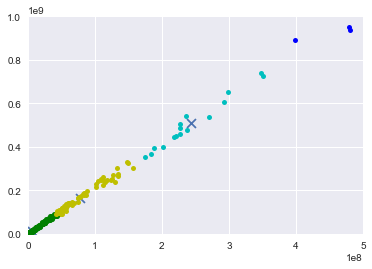

In [130]:

for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)
plt.axis([0,500000000,0,1000000000])  
plt.scatter(centros[:, 0],centros[:, 1], marker = "x", s=80, linewidths = 5)

plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



xfeatures = StandardScaler().fit_transform(x)
# Keeping 2 components
pca = PCA(n_components=2)
# Explicative variables transformation
principalComponents = pca.fit_transform(xfeatures)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['INGRESSOS','DESPESES'])



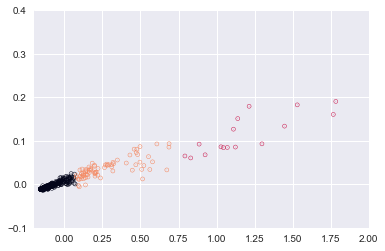

In [44]:

kmeans = KMeans(n_clusters=5, random_state=0).fit(principalDf)
fig, ax = plt.subplots(1,1)
plt.axis([-0.2,2,-0.1,0.4])
ax.scatter(principalDf['INGRESSOS'],principalDf['DESPESES'], s=0.25, c=kmeans.labels_,linewidth=4)

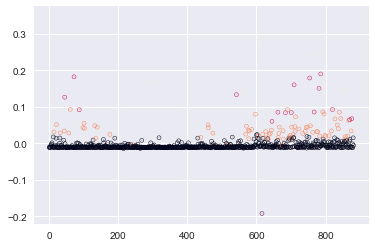

In [87]:

kmeans = KMeans(n_clusters=5, random_state=0).fit(principalDf)
fig, ax = plt.subplots(1,1)
ax.scatter([principalDf.index.get_values()],principalDf['DESPESES'], s=0.25, c=kmeans.labels_,linewidth=4)